<p>Netflix has become one of the world’s largest entertainment platforms, offering thousands of movies
and TV shows. Understanding its content trends can help producers, marketers, and strategists
make data-driven decisions. We will perform Exploratory Data Analysis
(EDA) on Netflix’s titles dataset to uncover trends related to genres, countries, release years, and
content ratings.</p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('netflix_titles.csv')

df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
# They are all such values, that we cannot estimate them

df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<h1>EDA</h1>

In [5]:
# Total movies

total_movies = df['type'].value_counts()['Movie']
print(f'Total {total_movies}')

Total 6131


In [6]:
# Top 10 countries producing Netflix content

top_10_countries = df.groupby('country').size().sort_values(ascending=False)

top_10_countries.head(10)

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
dtype: int64

In [7]:
# Most common genre on Netflix

# Extracting genre based on what each is listed in 
all_genre = {}

for genres in df.listed_in:

    cat = genres.split(',')

    for genre in cat:

        if genre in all_genre:
            all_genre[genre] += 1
        else:
            all_genre[genre] = 1

most_common=   max_key = max(all_genre, key=all_genre.get)
        
print(f'Most common genre is{most_common} with count of {all_genre[most_common]}')

Most common genre is International Movies with count of 2624


In [8]:
# years which saw the highest number of releases?

release_year = df.groupby('release_year').size().sort_values(ascending=False)

release_year.head(10)

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
dtype: int64

rating
66 min         1
74 min         1
84 min         1
G             41
NC-17          3
NR            80
PG           287
PG-13        490
R            799
TV-14       2160
TV-G         220
TV-MA       3207
TV-PG        863
TV-Y         307
TV-Y7        334
TV-Y7-FV       6
UR             3
dtype: int64


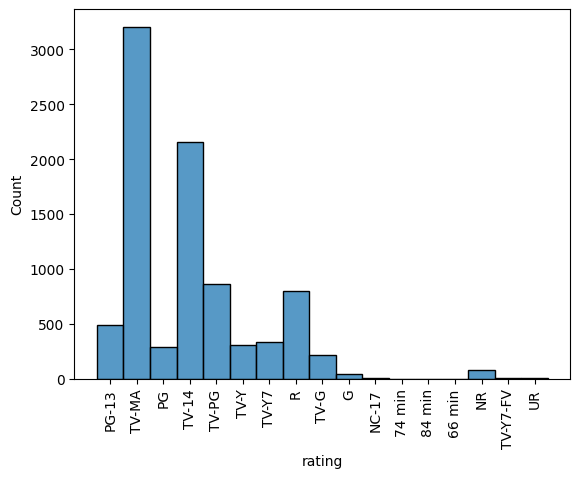

In [9]:
# Distribution of content ratings

content_rating = df.groupby('rating').size()
print(content_rating)

sns.histplot(data=df, x= 'rating')
plt.tick_params(axis='x', rotation=90)

In [10]:
# Directors have the most titles on Netflix

directors = df.groupby('director').size().sort_values(ascending=False)

directors.head(10)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          11
dtype: int64

<h1>Visualization</h1>

Text(0.5, 1.0, 'Movies vs Tv Shows')

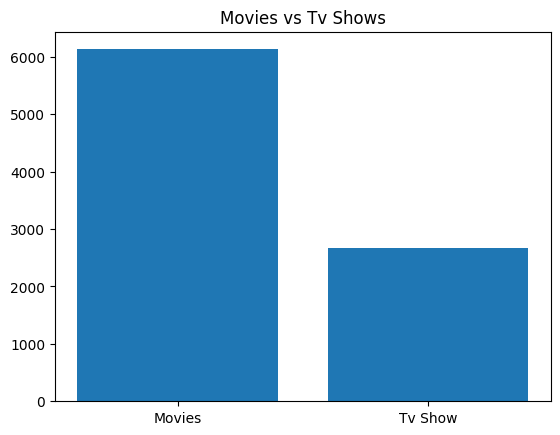

In [11]:
# Bar chart showing Movies vs TV Shows count.

plt.bar(x=['Movies', 'Tv Show'], height=df['type'].value_counts())
plt.title('Movies vs Tv Shows')

<Axes: ylabel='country'>

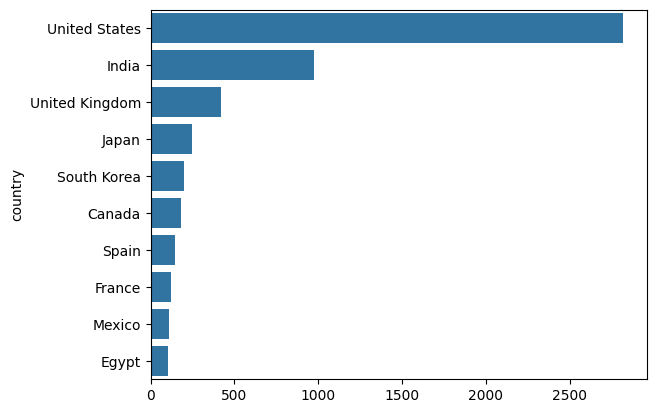

In [12]:
# Horizontal bar chart of Top 10 countries by content count.

sns.barplot(y=top_10_countries.index[:10], x=top_10_countries.to_list()[:10])

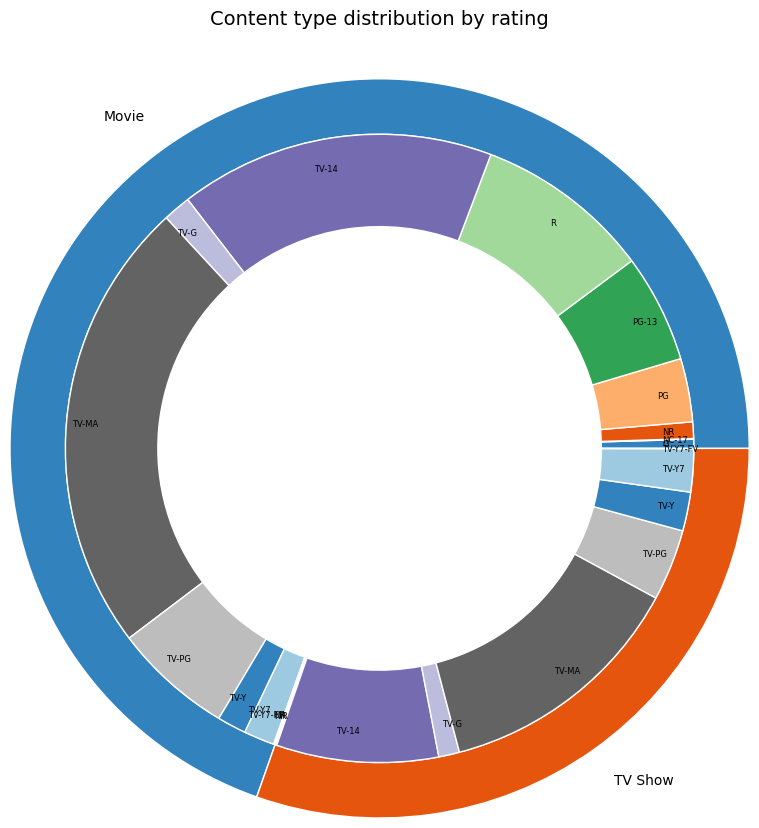

In [135]:
# Pie chart showing content type distribution by rating.
# Top 5

# Filter valid ratings
valid_df = df[~df['rating'].str.contains('min', na=False)]

# Outer ring: type counts
types = valid_df['type'].value_counts()

# Inner ring: rating distribution per type
ratings = valid_df.groupby(['type', 'rating']).size()

# Flatten ratings into a Series for pie plotting
ratings = ratings.reset_index(name='count')

# Colors
tab20c = plt.cm.tab20c.colors
outer_colors = [tab20c[0], tab20c[4]]
inner_colors = tab20c[::2]             

# Plot
size = 0.3
fig, ax = plt.subplots(figsize=(6, 6))

# Outer ring
ax.pie(types, labels=types.index, radius=2, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

# Inner ring
ax.pie(ratings['count'], labels=ratings['rating'], radius=2-size,
       colors=inner_colors, labeldistance=0.9,
       wedgeprops=dict(width=0.5, edgecolor='w'), textprops={'fontsize':6})

plt.title("Content type distribution by rating", fontsize=14, y=1.4)
plt.show()


<Axes: title={'center': 'Number of releases per year'}, xlabel='release_year'>

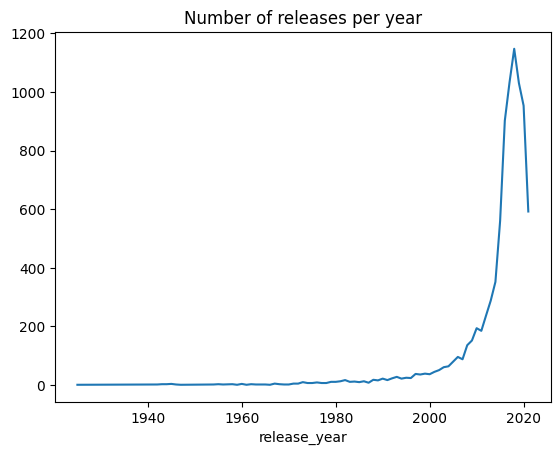

In [14]:
# Line plot showing number of releases per year.
release_year = df.groupby('release_year').size()

plt.title('Number of releases per year')
sns.lineplot( x=release_year.index, y=release_year.to_list())